In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns
import statsmodels.api as sm


In [ ]:
salesdata=pd.read_csv("Sales.csv")
salesdata

In [ ]:
salesdata.dtypes

In [ ]:
salesdata.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)
salesdata.Item_Weight.fillna(salesdata.Item_Weight.mean(),inplace=True)
salesdata.Outlet_Size.fillna(salesdata.Outlet_Size.mode()[0],inplace=True)
salesdata.Item_Fat_Content.replace({"Low Fat":0,"low fat":0,"LF":0,"Regular":1,"reg":1},inplace=True)

In [173]:
le=LabelEncoder()
salesdata.Item_Type=le.fit_transform(salesdata.Item_Type)
salesdata.Outlet_Size=le.fit_transform(salesdata.Outlet_Size)
salesdata.Outlet_Location_Type=le.fit_transform(salesdata.Outlet_Location_Type)
salesdata.Outlet_Type=le.fit_transform(salesdata.Outlet_Type)


In [174]:
x=salesdata.drop(columns="Item_Outlet_Sales")
y=salesdata["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

RSquared for Train 1.0
MeanSquared error score on train 0.0
RSquared for test 0.19374835429491266
MeanSquared error score on test 2282030.9279781566
max depth None


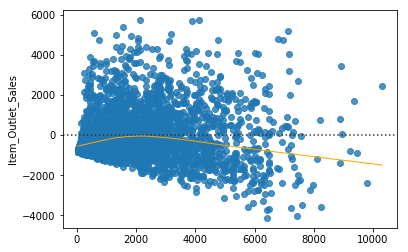

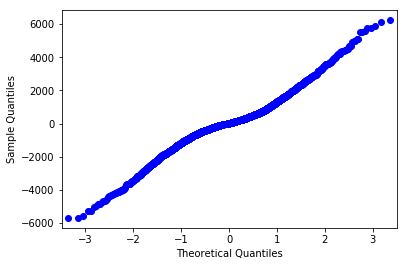

In [189]:
# DecisionTreeRegressor 
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predytrain=dtr.predict(X_train)
print("RSquared for Train",dtr.score(X_train,y_train))
print("MeanSquared error score on train",mean_squared_error(predytrain,y_train))
predytest=dtr.predict(X_test)
print("RSquared for test",dtr.score(X_test,y_test))
print("MeanSquared error score on test",mean_squared_error(predytest,y_test))
sns.residplot(x=predytest,y=y_test,lowess=True,line_kws={"color":"orange","lw":1})
sm.qqplot(predytest-y_test)
print("max depth",dtr.max_depth)

RSquared for Train 0.5084633148542523
MeanSquared error score on train 1447854.839655338
RSquared for test 0.5056385313717324
MeanSquared error score on test 1399250.6769072276


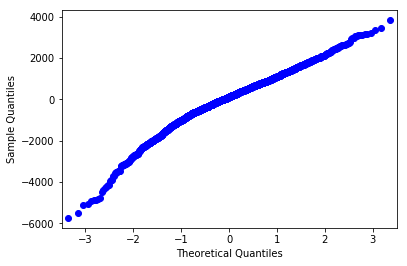

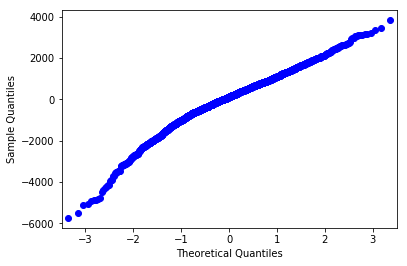

In [176]:
lr=LinearRegression()
lr.fit(X_train,y_train)
predytrain=lr.predict(X_train)
print("RSquared for Train",lr.score(X_train,y_train))
print("MeanSquared error score on train",mean_squared_error(predytrain,y_train))
predytest=lr.predict(X_test)
print("RSquared for test",lr.score(X_test,y_test))
print("MeanSquared error score on test",mean_squared_error(predytest,y_test))
sns.residplot(x=predytest,y=y_test,lowess=True,line_kws={"color":"orange","lw":1})
sm.qqplot(predytest-y_test)

In [183]:

pramgrid={"max_depth":range(1,dtr.tree_.max_depth+1,2),"max_features":range(1,len(dtr.feature_importances_)+1)}
gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=10),param_grid=pramgrid,n_jobs=-1)

/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RSquared for Train 0.6040067366967519
MeanSquared error score on train 1166425.1724660483
RSquared for test 0.598203314290642
MeanSquared error score on test 1137253.4473973208


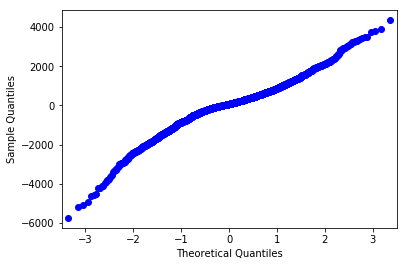

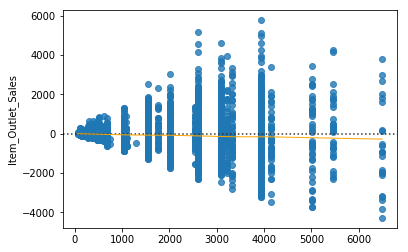

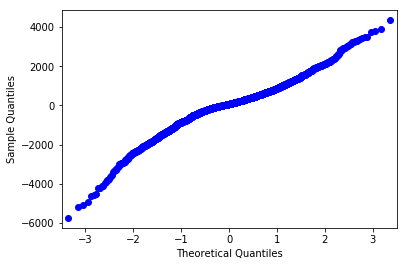

In [184]:
# DecisionTreeRegressor 
gs=gs.fit(X_train,y_train)
predytrain=gs.best_estimator_.predict(X_train)
print("RSquared for Train",gs.score(X_train,y_train))
print("MeanSquared error score on train",mean_squared_error(predytrain,y_train))
predytest=gs.best_estimator_.predict(X_test)
print("RSquared for test",gs.score(X_test,y_test))
print("MeanSquared error score on test",mean_squared_error(predytest,y_test))
sns.residplot(x=predytest,y=y_test,lowess=True,line_kws={"color":"orange","lw":1})
sm.qqplot(predytest-y_test)

In [187]:
print("max Depth",gs.best_estimator_.max_depth)
print("max Features",gs.best_estimator_.max_features_)

max Depth 5
max Features 9
